<a href="https://colab.research.google.com/github/KieranJP/Linear-Regression-Practice/blob/master/Deep_Neural_Network_Binary_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This allows me to upload the csv files used as the training and the test data fom my PC:**

In [0]:
#Uploading Test Data
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving FullELFFDataset.csv to FullELFFDataset.csv
User uploaded file "FullELFFDataset.csv" with length 14744861 bytes


In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import keras as K

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

#Imports Required
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Selecting the Csv to use then Displaying it
import pandas as pd
dataset = pd.read_csv("FullELFFDataset.csv")
dataset.columns

#Using sklearn's split function to split the data into training and testing data.
from sklearn.model_selection import train_test_split

X = dataset.values
Y = dataset.Defective.values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

#Attempt at creating a Grid Search to optimise hyperparamter

def create_model(batch=64, epoch=500, optimizer='adam', learn_rate=0.001, activation='relu'):
  model = Sequential()
  model.add(K.layers.Dense(units=40, input_dim=40, activation='relu', kernel_initializer='truncated_normal')) 
  model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal')) 
  model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal'))
  model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer='truncated_normal'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
  return model

In [0]:
hparamsBatch = [64, 128, 256]
hparamsEpoch = [500, 1000]
hparamsLR = [0.0001, 0.001, 0.01]

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

#Defining the Range
param_grid = dict(batch_size=hparamsBatch,
                  epochs=hparamsEpoch,
                  learn_rate=hparamsLR)

grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    n_jobs=18,
                    cv=3,
                    scoring='accuracy',
                    verbose=10)
grid_result = grid.fit(X_train, Y_train)
#CREATE A SMALLER SAMPLE TO GRID SEARCH TO IMPROVE TIME

# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=18)]: Using backend LokyBackend with 18 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=18)]: Done   3 out of  18 | elapsed: 105.3min remaining: 526.5min
[Parallel(n_jobs=18)]: Done   5 out of  18 | elapsed: 110.1min remaining: 286.3min
[Parallel(n_jobs=18)]: Done   7 out of  18 | elapsed: 119.6min remaining: 187.9min
[Parallel(n_jobs=18)]: Done   9 out of  18 | elapsed: 119.7min remaining: 119.7min
[Parallel(n_jobs=18)]: Done  11 out of  18 | elapsed: 180.2min remaining: 114.7min
[Parallel(n_jobs=18)]: Done  13 out of  18 | elapsed: 180.9min remaining: 69.6min
[Parallel(n_jobs=18)]: Done  15 out of  18 | elapsed: 181.1min remaining: 36.2min
[Parallel(n_jobs=18)]: Done  18 out of  18 | elaps

Best: 0.951352 using {'batch_size': 64, 'epochs': 1000, 'learn_rate': 0.01}
0.951308 (0.001095) with: {'batch_size': 64, 'epochs': 500, 'learn_rate': 0.0001}
0.951264 (0.001146) with: {'batch_size': 64, 'epochs': 500, 'learn_rate': 0.001}
0.951235 (0.001149) with: {'batch_size': 64, 'epochs': 500, 'learn_rate': 0.01}
0.951250 (0.001133) with: {'batch_size': 64, 'epochs': 1000, 'learn_rate': 0.0001}
0.951235 (0.001149) with: {'batch_size': 64, 'epochs': 1000, 'learn_rate': 0.001}
0.951352 (0.001021) with: {'batch_size': 64, 'epochs': 1000, 'learn_rate': 0.01}


In [0]:
#Creates a NN
model = Sequential()
#Input Layer
model.add(K.layers.Dense(units=40, input_dim=40, activation='relu', kernel_initializer='truncated_normal')) 
#Hidden Layers
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal')) 
model.add(K.layers.Dense(units=32, activation='relu', kernel_initializer='truncated_normal'))
#Output Layers
model.add(K.layers.Dense(units=1, activation='sigmoid', kernel_initializer='truncated_normal'))

simple_sgd = K.optimizers.Adam(lr=0.00001)  
model.compile(loss='binary_crossentropy', optimizer=simple_sgd, metrics=['accuracy']) 

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Find out the size of each class so can change weighting
trueWeight = len(Y_train[Y_train==False])
falseWeight = len(Y_train[Y_train==True])

history = model.fit(X_train, Y_train, batch_size=64, epochs=1000, validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 54924 samples, validate on 13732 samples
Epoch 1/1000
54924/54924 [==============================] - 2s 38us/step - loss: 0.8238 - acc: 0.7278 - val_loss: 0.5758 - val_acc: 0.9513
Epoch 2/1000
54924/54924 [==============================] - 1s 25us/step - loss: 0.4922 - acc: 0.9496 - val_loss: 0.3797 - val_acc: 0.9511
Epoch 3/1000
54924/54924 [==============================] - 1s 26us/step - loss: 0.3205 - acc: 0.9495 - val_loss: 0.2661 - val_acc: 0.9511
Epoch 4/1000
54924/54924 [==============================] - 1s 25us/step - loss: 0.2572 - acc: 0.9481 - val_loss: 0.2330 - val_acc: 0.9512
Epoch 5/1000
54924/54924 [==============================] - 1s 25us/step - loss: 0.2328 - acc: 0.9490 - val_loss: 0.2180 - val_acc: 0.9511
Epoch 6/1000
54924/54924 [==============================] - 1s 25us/step - loss: 0.2259 - acc: 0.9474 - val_loss: 0.2125 - val_acc: 0.9510
Epoch 7/1000
54924/54924 [==============================] - 1s 25us/

[[27871    66]
 [   44  1443]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     27937
        True       0.96      0.97      0.96      1487

   micro avg       1.00      1.00      1.00     29424
   macro avg       0.98      0.98      0.98     29424
weighted avg       1.00      1.00      1.00     29424



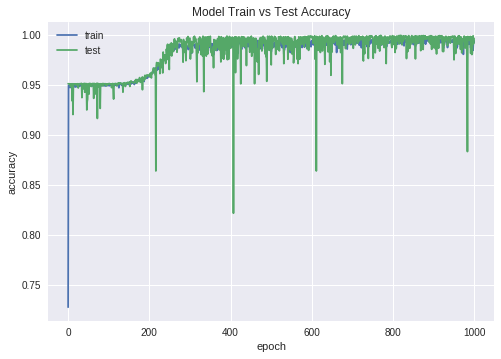

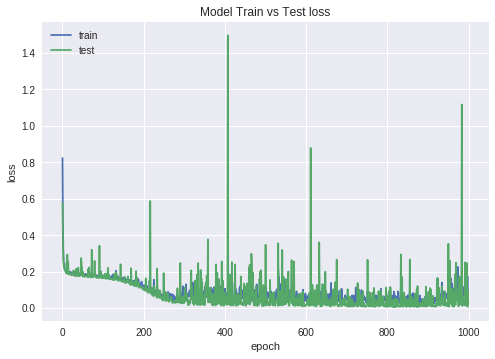

In [0]:
Y_predict = model.predict(X_test)
Y_predict =(Y_predict>0.5)
print(confusion_matrix(Y_test, Y_predict))
print(classification_report(Y_test, Y_predict))

pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('Model Train vs Test Accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('Model Train vs Test loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'test'], loc='upper left')
pyplot.show()